# Homework 5 writeup solutions

## Name: YOUR NAME HERE

## Problem 1

You are going to need to load in your data again. Do that in the cell below.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

M = np.genfromtxt('CO2_data.csv', delimiter=',')
t = M[:, 0]
CO2 = M[:, 1]


### Part a - plot

Optimization terminated successfully.
         Current function value: 3861.342588
         Iterations: 140
         Function evaluations: 248
Optimization terminated successfully.
         Current function value: 710.242620
         Iterations: 1091
         Function evaluations: 1676


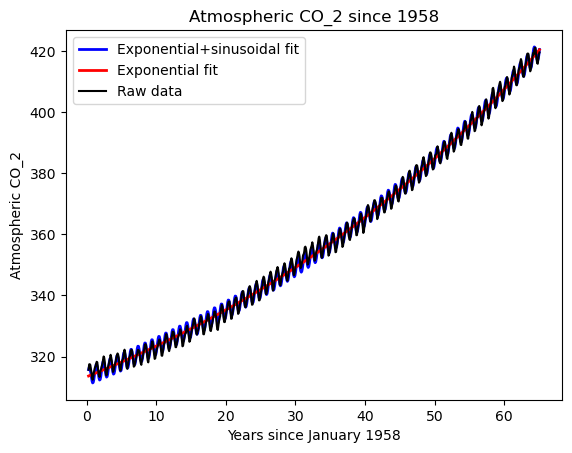

In [20]:
def sumSquaredError(a,b,r):
    y = lambda t: a + b*np.exp(r*t)
    error = sum(np.abs(y(t) - CO2)**2)
    return error

adapter = lambda p: sumSquaredError(p[0], p[1], p[2])
guess = np.array([300, 30, 0.03])
A4 = scipy.optimize.fmin(adapter, guess)
A5 = sumSquaredError(A4[0],A4[1],A4[2])

def sumSquaredError_2(a,b,r,c,d,e):
    y = lambda t: a + b*np.exp(r*t) + c*np.sin(d*(t-e))
    error = sum(np.abs(y(t) - CO2)**2)
    return error

A8 = sumSquaredError_2(300,30,0.03,-5,4,0) 
guess = np.append(A4, np.array([-5,4,0]))
adapter = lambda p: sumSquaredError_2(p[0], p[1], p[2], p[3], p[4], p[5])
A9 = scipy.optimize.fmin(adapter, guess,maxiter=2000)

plt.plot(t,A9[0] + A9[1]*np.exp(A9[2]*t) + A9[3]*np.sin(A9[4]*(t-A9[5])),'b',linewidth = 2,label="Exponential+sinusoidal fit")
plt.plot(t,A4[0] + A4[1]*np.exp(A4[2]*t),'r',linewidth = 2,label="Exponential fit")
plt.plot(t, CO2,'-k',markersize = 2,label="Raw data")

plt.title("Atmospheric CO_2 since 1958")
plt.xlabel("Years since January 1958")
plt.ylabel("Atmospheric CO_2")
plt.legend(loc="upper left")
plt.show()

### Part b - Discussion of error

In [21]:
A5 = sumSquaredError(A4[0],A4[1],A4[2])
A10 = sumSquaredError_2(A9[0],A9[1],A9[2],A9[3],A9[4],A9[5])
print(A5)
print(A10)

3861.3425884150547
710.2426198778329


The error for the exponential fit is 3861.342 and the error for the exponential + sinusoidal fir is 710.242. The exponential + sinusoidal fit gives less of an error. If you look closely at the plot, the blue line seems to follow the black line much closer than the red line follows the black line. 

### Part c - Prediction

To predict the amount of atmospheric CO_2 in 2023, the exponential + sinusoidal fit would be most accurate. As we saw before, this model produces the least amount of error of the two fits. Because we weant our prediucation to be as accurate as possible, I would suggest going with the exponential + sinusoidal fit. 

## Problem 2

We'll need to load in the Salmon data again. Do that below.

In [22]:
M = np.genfromtxt('salmon_data.csv', delimiter=',')
year = M[:,0]
salmon = M[:,1] 

### Part a - plot

(100000.0, 1500000.0)

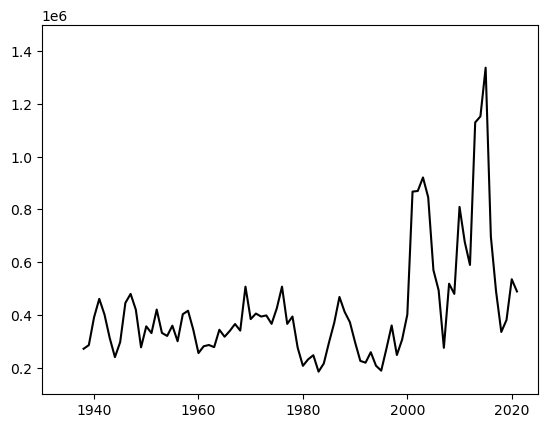

In [24]:
plt.plot(year,salmon,'-k')
plt.xlim(1930,2025)
plt.ylim(100000,1500000)

plt.plot

### Part b - Line of best fit discussion

The slope of the line of best fit correlates to the change of fish population over time. In other words, the higher the slope of best fit line, the higher the rate of change (and vice versa)

### Part c - Accuracy of predictions

The fifth degree polynomial gave the most accurate prediction, while the first degree gave the least accurate prediction

### Part d - Predicting Salmon populations in 2050